<a href="https://colab.research.google.com/github/erica00j/machinelearning/blob/main/mlstudy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df=pd.read_csv('/content/Melbourne_housing_FULL.csv')

del df['Address'] 
del df['Method'] 
del df['SellerG']
del df['Date'] 
del df['Postcode'] 
del df['YearBuilt'] 
del df['Type'] 
del df['Lattitude'] 
del df['Longtitude'] 
del df['Regionname'] 
del df['Suburb']
del df['CouncilArea']

df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [8]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df=pd.read_csv('/content/Melbourne_housing_FULL.csv')

del df['Address'] 
del df['Method'] 
del df['SellerG']
del df['Date'] 
del df['Postcode'] 
del df['YearBuilt'] 
del df['Type'] 
del df['Lattitude'] 
del df['Longtitude'] 
del df['Regionname'] 
del df['Suburb']
del df['CouncilArea']

df.isnull().sum()

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

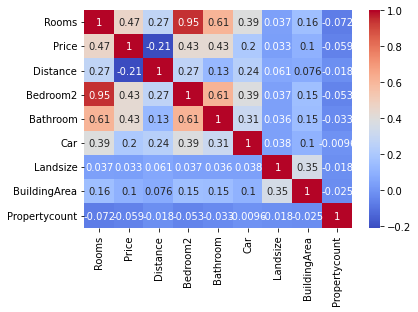

In [9]:
df_heat = df.corr()
sns.heatmap(df_heat,annot=True,cmap='coolwarm')


In [10]:
df.shape

(34857, 9)

In [11]:
#Remove variables 
del df['Bedroom2']
del df['Landsize']
del df['Propertycount'] 

#Remove variable BuildingArea
del df['BuildingArea'] 

#Fill missing values with the mean for the variable Car
df['Car'].fillna(df['Car'].mean(),inplace=True) 
    
#Drop remaining missing values on a row-by-row basis 
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

df.shape


(20800, 5)

In [12]:
X = df[['Rooms', 'Distance', 'Bathroom', 'Car']] 
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)

#Find y-intercept 
model.intercept_


282725.3156777688

In [13]:
# Find x coefficients 
model.coef_

array([269450.10790036, -37787.76622417, 207173.05927097,  47417.17159475])

In [14]:
model_results = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients']) 
model_results

,Coefficients
Rooms,269450.107900
Distance,-37787.766224
Bathroom,207173.059271
Car,47417.171595


In [15]:
new_house = [ 2, 2.5, 1, 1]
new_house_predict = model.predict([new_house]) 
new_house_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([981746.34678378])

In [16]:
prediction = model.predict(X_test)
metrics.mean_absolute_error(y_test, prediction)

363782.9423236326